# Analysis of the trajectory cost function



In [2]:
import pickle, numpy as np, matplotlib.pyplot as plt
X0, Y0, Z0, VX0, VY0, VZ0, AX0, AY0, AZ0, XF, YF, ZF, VXF, VYF, VZF, AXF, AYF, AZF, COST = np.arange(19)
get_yaw = lambda t: np.arctan2(t[VYF], t[VXF])
get_vnorm = lambda t: np.linalg.norm(t[VXF:VZF+1])
lerp = lambda a, b, t: np.array(a) * (1-t) + np.array(b) * t

In [155]:
def center_yaw(angles, offset=0):
    a = lift(angles, offset)
    m = np.mean(a)
    return lift(a, -m)
def lift(angles, offset=0):
  out = np.zeros(angles.shape)
  for i, angle in enumerate(angles):
    if angle + offset >= np.pi:
      out[i] = angle + offset - 2 * np.pi
    elif angle + offset <= -np.pi:
      out[i] = angle + offset + 2 * np.pi
    else:
      out[i] = angle + offset
  return out
def get_norms(mpl):
  # Find all possible norms
  norms = np.zeros(mpl.shape[0])
  for i, t in enumerate(mpl):
    norms[i] = get_vnorm(t)
  #plt.scatter(np.arange(len(norms)), norms)
  norms = norms[0:15]
  return norms
def get_yaws(mpl):
  yaw = np.zeros(mpl[::15].shape[0])
  for i, t in enumerate(mpl[::15]):
    yaw[i] = get_yaw(t)
  return yaw

In [158]:
mpl.shape

(315, 19)

<img src="./mpls3.png" width="400"/>

Text(0.5, 0, 'Final velocity norm')

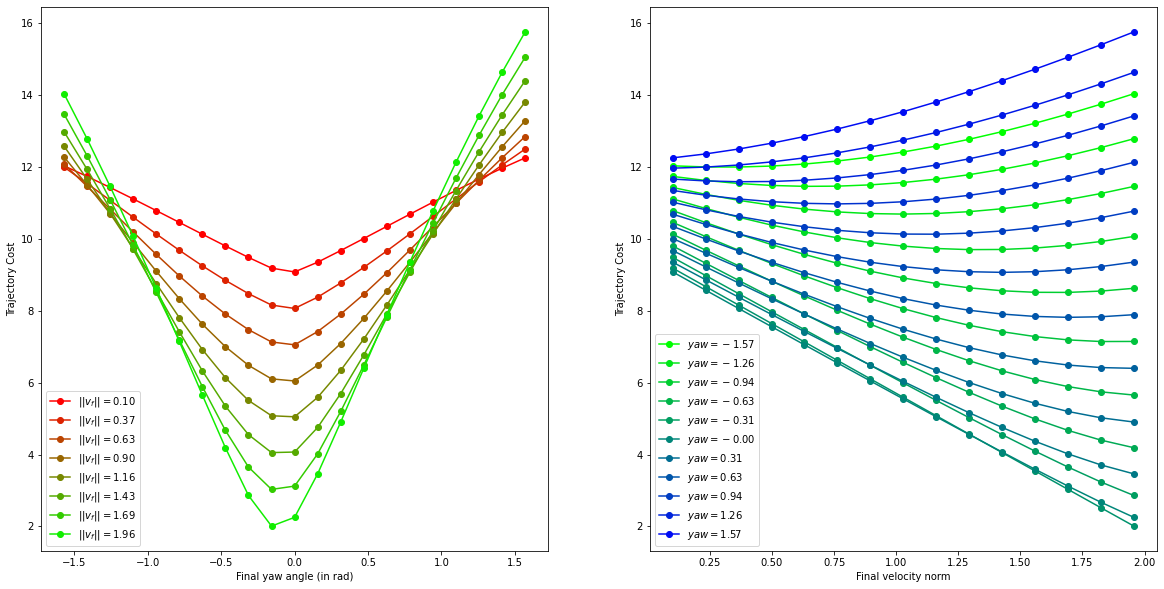

In [157]:
data = np.load('mpls3.npy')
mpl = data[5]
yaw = center_yaw(get_yaws(mpl), 1)
norms = get_norms(mpl)

plt.figure(figsize=(20,10))
plt.subplot(121)
for offset in range(0, 15, 2):
  plt.plot(yaw, mpl[offset::15, COST], 'o-', label='$||v_f|| = {:.2f}$'.format(norms[offset]), color=lerp((1,0,0),(0,1,0),offset/15))
plt.legend()
plt.ylabel('Trajectory Cost')
plt.xlabel('Final yaw angle (in rad)')

plt.subplot(122)
n = mpl.shape[0] // len(norms)
for i in range(0, n, 1):
  #plt.plot(norms, mpl[i*15:(i+1)*15, COST], 'o-', label='$yaw = {:1.2f}$'.format(get_yaw(mpl[i*15])), color=lerp((1,.6,0),(0,.6,1),i/n))
  plt.plot(norms, mpl[i*15:(i+1)*15, COST], 'o-', label='$yaw = {:1.2f}$'.format(yaw[i]) if i%2==0 else '', color=lerp((0,1,0),(0,0,1),i/n))
plt.legend()
plt.ylabel('Trajectory Cost')
plt.xlabel('Final velocity norm')

<img src="./mpls4.png" width="400"/>

data = np.load('mpls4.npy')
mpl = data[5]
yaw = center_yaw(get_yaws(mpl), 2)
norms = get_norms(mpl)

mpl[:, COST][mpl[:, COST] > 1000] = 20

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.ylim(top=18)
for offset in range(0, 15, 2):
    mask = mpl[offset::15, COST] < 20
    plt.plot(yaw[mask], mpl[offset::15, COST][mask], 'o-', label='$||v_f|| = {:.2f}$'.format(norms[offset]), color=lerp((1,0,0),(0,1,0),offset/15))
plt.legend()
plt.ylabel('Trajectory Cost')
plt.xlabel('Final yaw angle (in rad)')

plt.subplot(122)
plt.ylim(top=18)
n = mpl.shape[0] // len(norms)
for i in range(0, n, 1):
    mask = mpl[i*15:(i+1)*15, COST] < 20
    plt.plot(norms[mask], mpl[i*15:(i+1)*15, COST][mask], 'o-', label='$yaw = {:1.2f}$'.format(yaw[i]) if i%2==0 else '', color=lerp((0,1,0),(0,0,1),i/n))
plt.legend()
plt.ylabel('Trajectory Cost')
plt.xlabel('Final velocity norm')

<img src="./mpls5.png" width="400"/>

Text(0.5, 0, 'Final velocity norm')

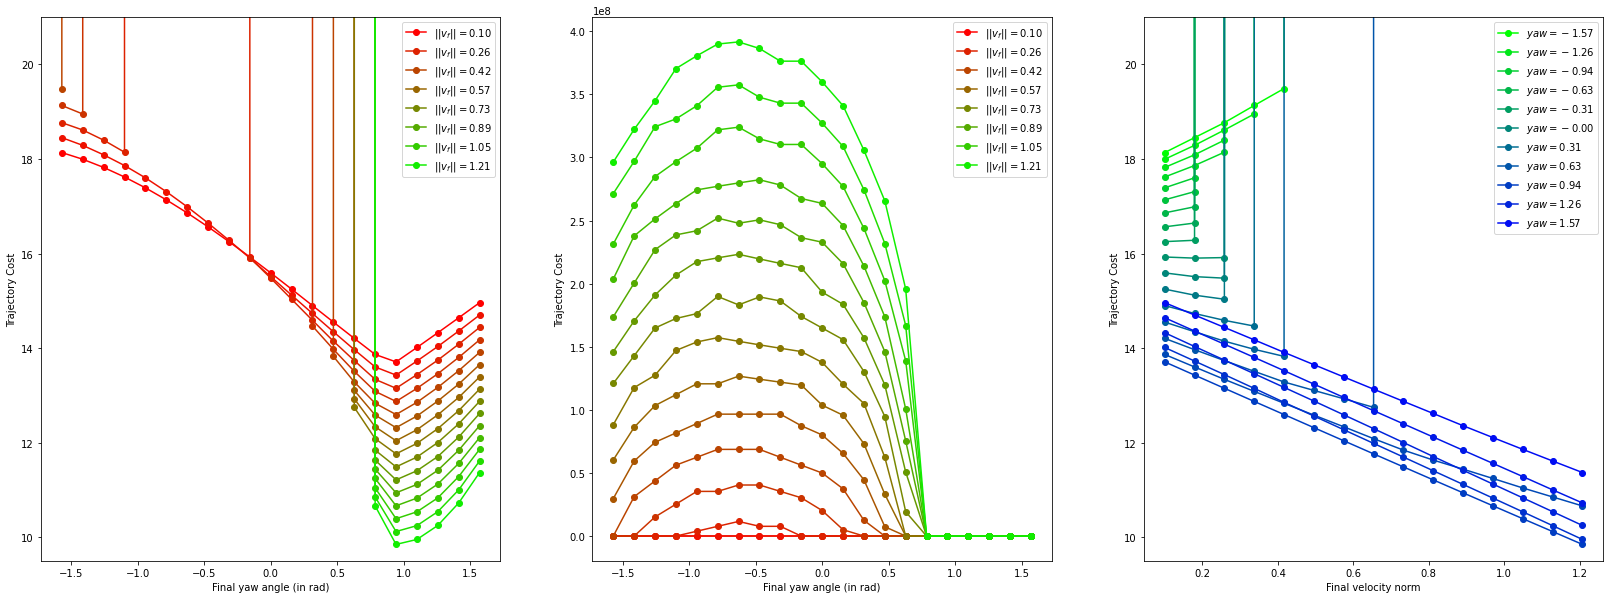

In [144]:
data = np.load('mpls5.npy')
mpl = data[6]
yaw = center_yaw(get_yaws(mpl), 2)
norms = get_norms(mpl)

#mpl[:, COST][mpl[:, COST] > 1000] = 22

plt.figure(figsize=(28,10))
plt.subplot(131)
plt.ylim(9.5, 21)
for i in range(0, 15, 1):
    plt.plot(yaw, mpl[i::15, COST], 'o-', label='$||v_f|| = {:.2f}$'.format(norms[i]) if i%2==0 else '', color=lerp((1,0,0),(0,1,0),i/15))
plt.legend()
plt.ylabel('Trajectory Cost')
plt.xlabel('Final yaw angle (in rad)')

plt.subplot(132)
#plt.ylim(9.5, 21)
for i in range(0, 15, 1):
    plt.plot(yaw, mpl[i::15, COST], 'o-', label='$||v_f|| = {:.2f}$'.format(norms[i]) if i%2==0 else '', color=lerp((1,0,0),(0,1,0),i/15))
plt.legend()
plt.ylabel('Trajectory Cost')
plt.xlabel('Final yaw angle (in rad)')

plt.subplot(133)
plt.ylim(9.5, 21)
n = mpl.shape[0] // len(norms)
for i in range(0, n, 1):
    plt.plot(norms, mpl[i*15:(i+1)*15, COST], 'o-', label='$yaw = {:1.2f}$'.format(yaw[i]) if i%2==0 else '', color=lerp((0,1,0),(0,0,1),i/n))
plt.legend()
plt.ylabel('Trajectory Cost')
plt.xlabel('Final velocity norm')

<img src="./mpls6.png" width="400"/>

Text(0.5, 0, 'Final velocity norm $Z_f=3.8$ (in $m.s^{-1}$)')

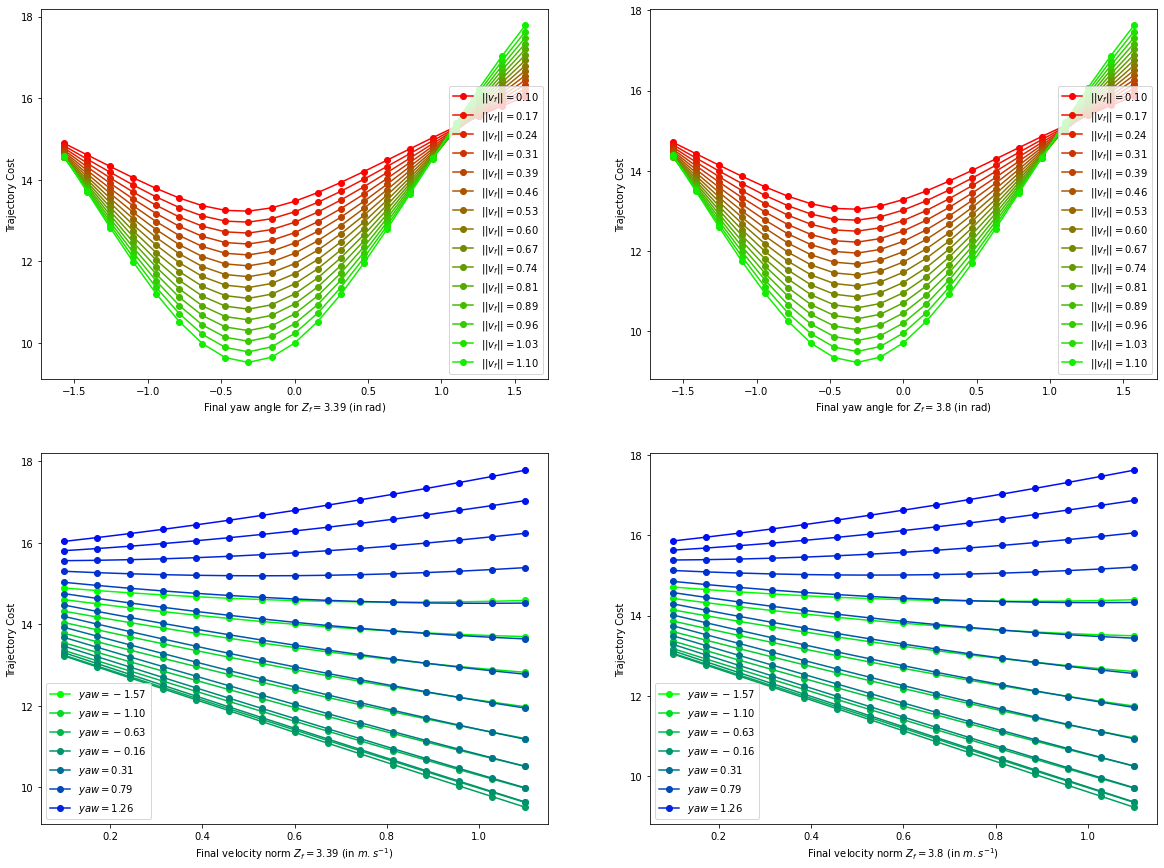

In [198]:
data = np.load('mpls6.npy')
mpl = data[3][:630]
yaw = center_yaw(get_yaws(mpl), 2)
norms = get_norms(mpl)

#mpl[:, COST][mpl[:, COST] > 1000] = 22

plt.figure(figsize=(20,15))
plt.subplot(221)
for i in range(0, 15, 1):
    plt.plot(yaw[:int(315/15)], mpl[i:i+315:15, COST], 'o-', label='$||v_f|| = {:.2f}$'.format(norms[i]), color=lerp((1,0,0),(0,1,0),i/15))
plt.legend()
plt.ylabel('Trajectory Cost')
plt.xlabel('Final yaw angle for $Z_f=3.39$ (in rad)')

plt.subplot(222)
for i in range(0, 15, 1):
    plt.plot(yaw[int(315/15):], mpl[i+315::15, COST], 'o-', label='$||v_f|| = {:.2f}$'.format(norms[i]), color=lerp((1,0,0),(0,1,0),i/15))
plt.legend()
plt.ylabel('Trajectory Cost')
plt.xlabel('Final yaw angle for $Z_f=3.8$ (in rad)')

plt.subplot(223)
n = mpl.shape[0]//2 // len(norms)
for i in range(0, n, 1):
    plt.plot(norms, mpl[i*15:(i+1)*15, COST], 'o-', label='$yaw = {:1.2f}$'.format(yaw[i]) if i%3==0 else '', color=lerp((0,1,0),(0,0,1),i/n))
plt.legend()
plt.ylabel('Trajectory Cost')
plt.xlabel('Final velocity norm $Z_f=3.39$ (in $m.s^{-1}$)')

plt.subplot(224)
n = mpl.shape[0]//2 // len(norms)
for i in range(n, n*2, 1):
    plt.plot(norms, mpl[i*15:(i+1)*15, COST], 'o-', label='$yaw = {:1.2f}$'.format(yaw[i%n]) if i%3==0 else '', color=lerp((0,1,0),(0,0,1),(i%n)/n))
plt.legend()
plt.ylabel('Trajectory Cost')
plt.xlabel('Final velocity norm $Z_f=3.8$ (in $m.s^{-1}$)')

In [192]:
mpl[200:400, ZF]

array([3.39304355, 3.39304355, 3.39304355, 3.39304355, 3.39304355,
       3.39304355, 3.39304355, 3.39304355, 3.39304355, 3.39304355,
       3.39304355, 3.39304355, 3.39304355, 3.39304355, 3.39304355,
       3.39304355, 3.39304355, 3.39304355, 3.39304355, 3.39304355,
       3.39304355, 3.39304355, 3.39304355, 3.39304355, 3.39304355,
       3.39304355, 3.39304355, 3.39304355, 3.39304355, 3.39304355,
       3.39304355, 3.39304355, 3.39304355, 3.39304355, 3.39304355,
       3.39304355, 3.39304355, 3.39304355, 3.39304355, 3.39304355,
       3.39304355, 3.39304355, 3.39304355, 3.39304355, 3.39304355,
       3.39304355, 3.39304355, 3.39304355, 3.39304355, 3.39304355,
       3.39304355, 3.39304355, 3.39304355, 3.39304355, 3.39304355,
       3.39304355, 3.39304355, 3.39304355, 3.39304355, 3.39304355,
       3.39304355, 3.39304355, 3.39304355, 3.39304355, 3.39304355,
       3.39304355, 3.39304355, 3.39304355, 3.39304355, 3.39304355,
       3.39304355, 3.39304355, 3.39304355, 3.39304355, 3.39304